### Dataset

- [Lamb et al. (2020)](https://zenodo.org/record/4031646#.X822jXUzZH5) (Global Whole Lithosphere Isostasy datasets)

- [EMC-CAM2016](http://ds.iris.edu/ds/products/emc-cam2016/) (Global upper mantle surface wave tomography model)(Priestley et al., 2013, 2019)

- [CRUST1.0](https://igppweb.ucsd.edu/~gabi/crust1.html) (A New Global Crustal Model at 1x1 Degrees) (Laske et al., 2013)

- [ETOPO5](https://www.ngdc.noaa.gov/mgg/global/) (5 arc-minute global relief model of Earth's surface) [[Download]](https://www.eea.europa.eu/data-and-maps/data/world-digital-elevation-model-etopo5)

- [age.3.6](https://www.ngdc.noaa.gov/mgg/ocean_age/data/2008/grids/age/) (Age, spreading rates and spreading asymmetry of the world's ocean crust)(Muller et al., 2008) 

- [Litho1.0](https://igppweb.ucsd.edu/~gabi/litho1.0.html) (Global model of lithospheric properties that builds upon Crust 1.0)(Pasyanos et al., 2014)

- [LithoRef18](https://academic.oup.com/gji/article/217/3/1602/5370085?login=true#supplementary-data)(Global reference model of the lithosphere and upper mantle from joint inversion and analysis of multiple data sets)(Afonso et al., 2019)[[software]](https://www.juanafonso.com/software)

### Package

- [stripy](https://github.com/underworldcode/stripy) (A Python interface to TRIPACK and STRIPACK Fortran code for (constrained) triangulation in Cartesian coordinates and on a sphere)]

- [litho1pt0](https://github.com/underworldcode/litho1pt0) (A Python interface to the crust 1.0 dataset and the lithospheric part of the litho 1.0 dataset)]

### Reference:
- Afonso, J. C., Salajegheh, F., Szwillus, W., Ebbing, J., & Gaina, C. (2019). A global reference model of the lithosphere and upper mantle from joint inversion and analysis of multiple data sets. Geophysical Journal International, 217(3), 1602-1628.
- Lamb, S., Moore, J. D., Perez‐Gussinye, M., & Stern, T. Global whole lithosphere isostasy: implications for surface elevations, structure, strength and densities of the continental lithosphere. Geochemistry, Geophysics, Geosystems, e2020GC009150.
- Laske, G., Masters., G., Ma, Z. and Pasyanos, M., Update on CRUST1.0 - A 1-degree Global Model of Earth's Crust, Geophys. Res. Abstracts, 15, Abstract EGU2013-2658, 2013.
- Priestley, K., and D. McKenzie (2013), The relationship between shear wave velocity, temperature, attenuation and viscosity in the shallow part of the mantle, Earth and Planetary Science Letters, 381, 78–91. https://doi.org/10.1016/j.epsl.2013.08.022
- Priestley, K. , McKenzie, D. and Ho, T. (2019). A Lithosphere–Asthenosphere Boundary—a Global Model Derived from Multimode Surface‐Wave Tomography and Petrology. In Lithospheric Discontinuities (eds H. Yuan and B. Romanowicz). https://doi.org/10.1002/9781119249740.ch6
- Muller, R. D., M. Sdrolias, C. Gaina, and W. R. Roest (2008), Age, spreading rates, and spreading asymmetry of the world's ocean crust, Geochem. Geophys. Geosyst., 9, Q04006, doi:10.1029/2007GC001743. 
- Pasyanos, M. E., Masters, T. G., Laske, G., & Ma, Z. (2014). LITHO1. 0: An updated crust and lithospheric model of the Earth. Journal of Geophysical Research: Solid Earth, 119(3), 2153-2173.
- Moresi, L. and Mather, B.R., (2019). Stripy: A Python module for (constrained) triangulation in Cartesian coordinates and on a sphere.. Journal of Open Source Software, 4(38), 1410, https://doi.org/10.21105/joss.01410
- Mark A. Wieczorek and Matthias Meschede (2018). SHTools — Tools for working with spherical harmonics, Geochemistry, Geophysics, Geosystems, 19, 2574-2592, doi:10.1029/2018GC007529.


In [1]:
import numpy as np
import litho1pt0 as litho
import stripy
import os
import xarray
import pyshtools as pysh
from scipy import ndimage

import sys 
sys.path.append("..") 
from ezgeopy import litho1pt0_dlc as litho_dlc
from ezgeopy import datafn as fn


import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
outputfile = "Output_1_02_01_ISO_fromLithoRef18/"
outputPath = os.path.join(os.path.abspath("."),outputfile) 
if not os.path.exists(outputPath):
    os.makedirs(outputPath)

In [3]:
# parameters for cartopy
rivers    = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m',edgecolor='Blue', facecolor="none")
coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '110m',edgecolor=(0.0,0.0,0.0),facecolor="none")
prj_base  = ccrs.PlateCarree()

# parameters for plot
xticks_global = np.arange(-180,180+10,60)
yticks_global = np.arange(-90,90+10,30)
xticks_area = np.arange(-180,180+5,5)
yticks_area = np.arange(-90,90+5,5)
extent_global = (-180,180,-90,90)
dpi = 150

In [4]:
def plot_map(data,extent_img,extent_fig,cmap,vmin,vmax,unit,figname):
    fig, ax = plt.subplots(1, 1, figsize=(16,8))
    ax = plt.axes(projection=prj_base)
    ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=figname)
    ax.set(title=fname_fig)
    ax.set_extent(extent_fig)
    #ax.set_global()
    m=ax.imshow(data, origin='lower',cmap=cmap,vmin=vmin,vmax=vmax,extent=extent_img, transform=prj_base)
    cbr = plt.colorbar(mappable=m, orientation='horizontal',pad=0.12,shrink=0.6, aspect=50)
    cbr.set_label(unit)
    ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
    plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')

In [5]:
# def plot_scattermap(lons,lats,data,cmap,vmin,vmax,unit,fname_fig):
#     fig, ax = plt.subplots(1, 1, figsize=(20,10))
#     ax = plt.axes(projection=prj_base)
#     #ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=fname_fig)
#     ax.set(title=fname_fig)
#     ax.set_global()
#     ax.add_feature(coastline, linewidth=1.0, edgecolor="Black", zorder=5)
#     m = ax.scatter(lons, lats, 
#                c=data, cmap=cmap, vmin=vmin,vmax=vmax,
#                s=5.0, transform=prj_base)
#     cbr = plt.colorbar(mappable=m, orientation='horizontal', shrink=0.5,pad=0.08,aspect=40)
#     cbr.set_label(unit)
#     plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

### LithoRef18

LithoRef18 is a new global model for the Earth’s lithosphere and upper mantle obtained through a formal joint inversion of 3D gravity anomalies, geoid height, satellite-derived gravity gradients and absolute elevation complemented with seismic, thermal and petrological prior information. The model includes crustal thickness, average crustal density, lithospheric thickness, depth-dependent density of the lithospheric mantle, lithospheric geotherms, and average density of the sublithospheric mantle down to 410 km depth with a surface discretization of 2°×2°.

LONG (Column 1) and LAT (Column 2) are Longitude and Latitud. The observed data are reported in (matlab index):
 - Column 3: Elevation (m)
 - Column 10: Geoid (m)
 - Column 11: Free Air (mGal)
 - Column 12: Gzz (Eotvos)
 - Column 13: Gxx (Eotvos)
 - Column 14: Gyy (Eotvos)
  
The main model parameters are reported in:
 - Column 4: Moho Depth (negative below sea level)
 - Column 5: LAB Depth  (negative below sea level)
 - Column 6: Average crustal density (kg m-3) 
 - Column 7: Average lithospheric mantle density (kg m-3)
 - Column 8: Sublithospheric mantle density (kg m-3)

In [6]:
fname = "../Data/LithoRef18.xyz"
data = np.loadtxt(fname,skiprows=9)

lons_ref18 = data[:,0]
lats_ref18 = data[:,1]
topo_ref18 = data[:,2]*0.001 # [km]
moho_ref18 = data[:,3]*0.001 # [km]
lab_ref18  = data[:,4]*0.001 # [km]
crho_ref18 = data[:,5]  #[kgm^3]
mlrho_ref18 = data[:,6] #[kgm^3]
marho_ref18 = data[:,7] #[kgm^3] 

minlon,maxlon,minlat,maxlat = lons_ref18.min(),lons_ref18.max(),lats_ref18.min(),lats_ref18.max()
extent_ref18 = (minlon,maxlon,minlat,maxlat)

is_ocean = topo_ref18 <= -1.
is_undersea = topo_ref18 < 0.

In [7]:
crho_ref18_g =  fn.xyz2grd(lons_ref18,lats_ref18,2,2,crho_ref18)

/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/home/nl/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)


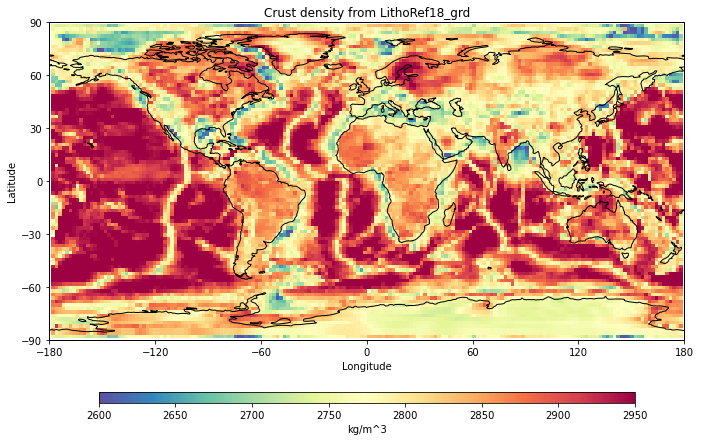

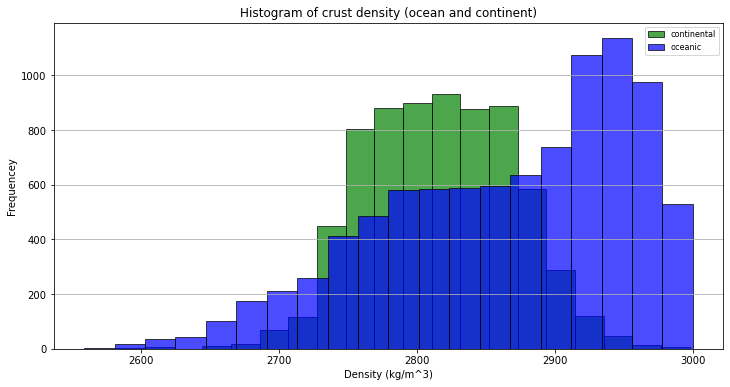

In [8]:
fname_fig = "Crust density from LithoRef18_grd"
plot_map(crho_ref18_g,extent_ref18,extent_global,cm.Spectral_r,2600,2950,"kg/m^3",fname_fig)


fname_fig = "Histogram of crust density (ocean and continent)"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.hist(crho_ref18[~is_ocean].flatten(),bins=20, facecolor="green", edgecolor="black", alpha=0.7,label="continental")
ax.hist(crho_ref18[is_ocean].flatten(),bins=20, facecolor="blue", edgecolor="black", alpha=0.7,label="oceanic")
ax.set_xlabel("Density (kg/m^3)")
ax.set_ylabel("Frequencey")
ax.grid(axis="y")
ax.set_title(fname_fig)
plt.legend(loc = 'upper right',prop = {'size':8}) 
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

In [9]:
Zmax = 410
ct_ref18  = -moho_ref18+topo_ref18 
mlt_ref18  = -lab_ref18+moho_ref18
mat_ref18  = Zmax+lab_ref18

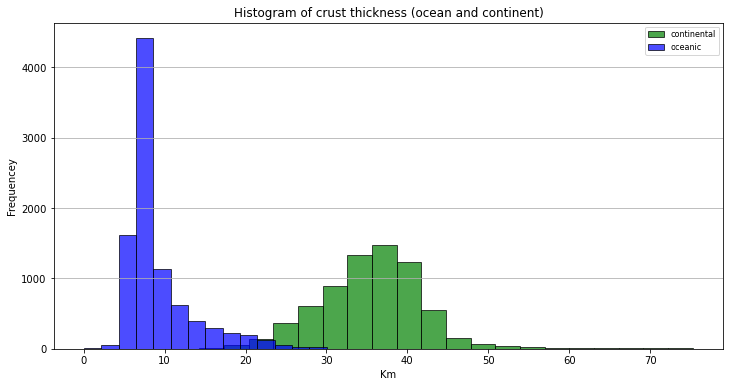

In [10]:
fname_fig = "Histogram of crust thickness (ocean and continent)"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.hist(ct_ref18[~is_ocean].flatten(),bins=20, facecolor="green", edgecolor="black", alpha=0.7,label="continental")
ax.hist(ct_ref18[is_ocean].flatten(),bins=20, facecolor="blue", edgecolor="black", alpha=0.7,label="oceanic")
ax.set_xlabel("Km")
ax.set_ylabel("Frequencey")
ax.grid(axis="y")
ax.set_title(fname_fig)
plt.legend(loc = 'upper right',prop = {'size':8}) 
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

### Compare with litho1.0

In [11]:
# load topo and crust thickness from litho1.0
l1 = litho.layer_depth(lat=lats_ref18, lon=lons_ref18, layerID="WATER-BOTTOM")*0.001
l2 = litho.layer_depth(lat=lats_ref18, lon=lons_ref18, layerID="CRUST1-TOP")*0.001
l3 = litho.layer_depth(lat=lats_ref18, lon=lons_ref18, layerID="CRUST3-BOTTOM")*0.001
l4 = litho.layer_depth(lat=lats_ref18, lon=lons_ref18, layerID="LID-BOTTOM")*0.001

topo_1pt0 = -l1
ct_1pt0   = l3-l1
mlt_1pt0  = l4-l3
mat_1pt0  = Zmax-l4


topo_1pt0_g = fn.xyz2grd(lons_ref18,lats_ref18,2,2,topo_1pt0)
ct_1pt0_g = fn.xyz2grd(lons_ref18,lats_ref18,2,2,ct_1pt0)
mlt_1pt0_g = fn.xyz2grd(lons_ref18,lats_ref18,2,2,mlt_1pt0)
mat_1pt0_g = fn.xyz2grd(lons_ref18,lats_ref18,2,2,mat_1pt0)

is_ocean_1py0 = topo_1pt0 < -1.

In [12]:
# from LithoRef18
ct_ref18_g = fn.xyz2grd(lons_ref18,lats_ref18,2,2,ct_ref18)
mlt_ref18_g = fn.xyz2grd(lons_ref18,lats_ref18,2,2,mlt_ref18 )

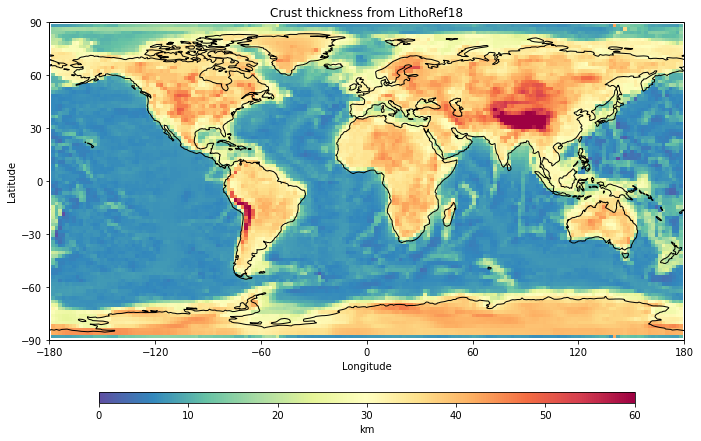

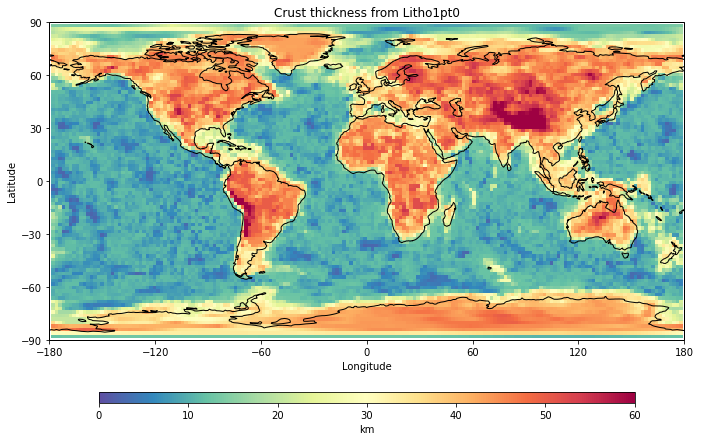

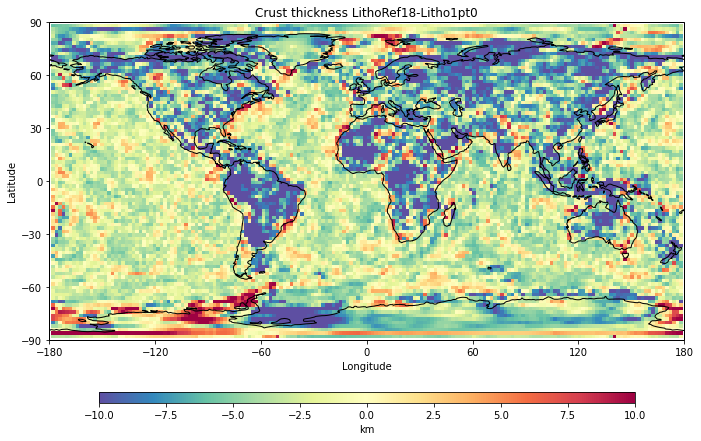

In [13]:
fname_fig = "Crust thickness from LithoRef18"
plot_map(ct_ref18_g ,extent_ref18,extent_global,cm.Spectral_r,0,60,"km",fname_fig)

fname_fig = "Crust thickness from Litho1pt0"
plot_map(ct_1pt0_g,extent_ref18,extent_global,cm.Spectral_r,0,60,"km",fname_fig)

fname_fig = "Crust thickness LithoRef18-Litho1pt0"
plot_map(ct_ref18_g-ct_1pt0_g,extent_ref18,extent_global,cm.Spectral_r,-10,10,"km",fname_fig)

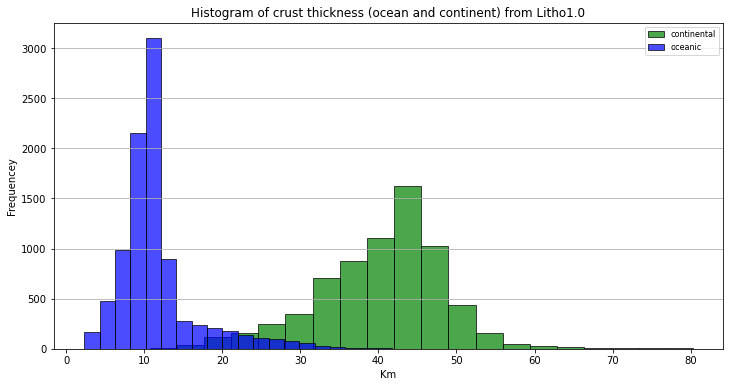

In [14]:
fname_fig = "Histogram of crust thickness (ocean and continent) from Litho1.0"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.hist(ct_1pt0[~is_ocean_1py0].flatten(),bins=20, facecolor="green", edgecolor="black", alpha=0.7,label="continental")
ax.hist(ct_1pt0[is_ocean_1py0].flatten(),bins=20, facecolor="blue", edgecolor="black", alpha=0.7,label="oceanic")
ax.set_xlabel("Km")
ax.set_ylabel("Frequencey")
ax.grid(axis="y")
ax.set_title(fname_fig)
plt.legend(loc = 'upper right',prop = {'size':8}) 
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

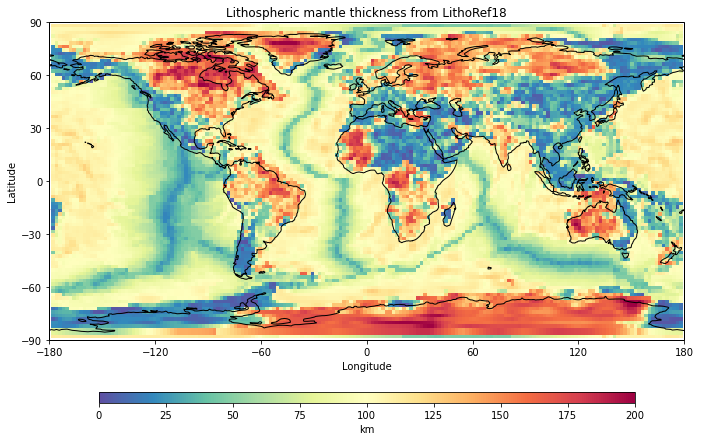

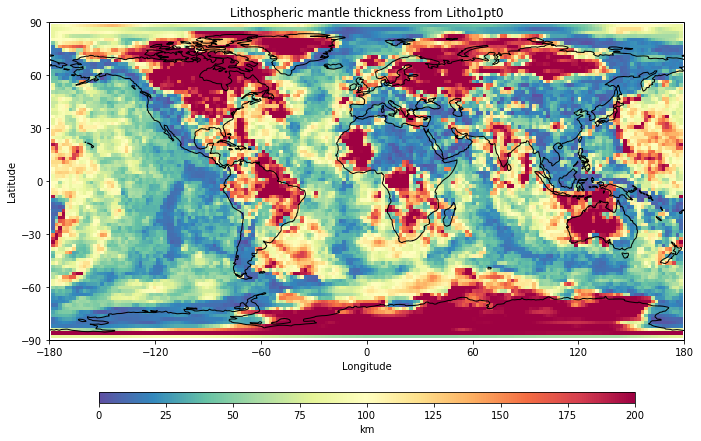

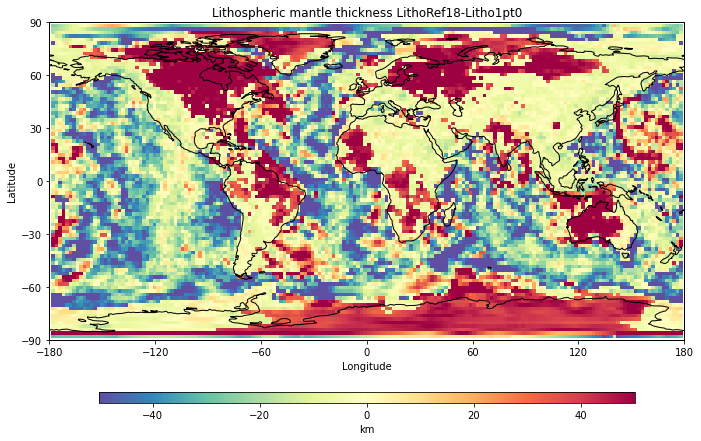

In [15]:
fname_fig = "Lithospheric mantle thickness from LithoRef18"
plot_map(mlt_ref18_g,extent_ref18,extent_global,cm.Spectral_r,0,200,"km",fname_fig)

fname_fig = "Lithospheric mantle thickness from Litho1pt0"
plot_map(mlt_1pt0_g,extent_ref18,extent_global,cm.Spectral_r,0,200,"km",fname_fig)

fname_fig = "Lithospheric mantle thickness LithoRef18-Litho1pt0"
plot_map(mlt_1pt0_g-mlt_ref18_g,extent_ref18,extent_global,cm.Spectral_r,-50,50,"km",fname_fig)

### Isostatic elevation
According to the principle of isostasy, all regions of the Earth with identical elevation must have the same buoyancy when referenced to a common compensation level. They assume here that the latter is located at the base of the model ($\sim$410-km discontinuity).

In their isostatic balance, the thermal gradient in the sub- lithospheric mantle does not include thermal perturbations that could arise from convection, which means that dynamic loads are implicitly ignored (Afonso et al., 2008).

The formulae to compute isostatic elevations (Lachenbruch & Morgan 1990; Afonso et al. 2008; 2013a Fullea et al. 2009, Afonso et al., 2019)

The elevation above ($E_a$) and below ($E_b$) sea level are given, respectively, by

$E_a = \frac{\rho_b-\rho_l}{\rho_b}L-L_0$

$E_b = E_a \frac{\rho_b}{\rho_b-\rho_w}$

where $L$ is the thickness of the column, $\rho_b$ is the density of the mantle at and below the compensation depth, $\rho_l$ is the depth-average density of the column, $\rho_w$ is the density of seawater (=1030 $kg m^{−3}$) and $L_0$ is a global calibration constant.


$L_0 = Z_{max} - \frac{\rho_{ridge} Z_{comp}+\rho_w E_{ridge}}{\rho_b} $

where $\rho_{ridge}=\frac{\rho_c*ct+\rho_{ml}*mlt+\rho_{ma}*mat}{Z_{comp}}$



In [16]:
idx = np.where(np.logical_and(lons_ref18==-95,lats_ref18==3))
lons_ref18[idx],lats_ref18[idx],topo_ref18[idx],crho_ref18[idx],mlrho_ref18[idx],marho_ref18[idx],ct_ref18 [idx],mlt_ref18 [idx],mat_ref18 [idx],

(array([-95.]),
 array([3.]),
 array([-2.885]),
 array([2799.54]),
 array([3239.37]),
 array([3417.38]),
 array([7.51767]),
 array([29.61671]),
 array([369.98062]))

In [17]:
wrho = 1030  # from Afonso2019
brho = 3600 # from Afonso2008 350.86-3931.7 from AK135(M57 M58)
Zmax = 410  # from Afonso2019


l = Zmax+topo_ref18 
lrho = (ct_ref18*crho_ref18+mlt_ref18*mlrho_ref18+mat_ref18*marho_ref18)/l

# a reference column at a MOR from Afonso2019
# Eridge = 2.8  # Eridge = -Eb
# Zcomp = Zmax-Eridge
# rrho = (7*2871+3409*(Zcomp-7))/Zcomp

# # a reference column at a MOR from Afonso2008
# Eridge = 2.6  # Eridge = -Eb
# Zcomp = Zmax-Eridge
# rrho = (7*2930+3409*(Zcomp-7))/Zcomp

# a reference column at a MOR from Afonso2019 the location
Eridge = 2.885  # Eridge = -Eb
Zcomp = Zmax-Eridge
rrho = (7.518*2799.54+29.616*3239.37+369.98062*3417.38)/Zcomp

l0 = Zmax- (wrho*Eridge+rrho*Zcomp)/brho
l0_ = (brho-rrho)/brho*Zcomp+Eridge*(brho-wrho)/brho
print(l0-l0_)

Ea = (brho-lrho)*l/brho-l0
Eb = Ea*brho/(brho-wrho)
Epre = Ea.copy()
Epre[is_undersea] = Eb[is_undersea]

dtopo = Epre-topo_ref18
dtopo_g = fn.xyz2grd(lons_ref18,lats_ref18,2,2,dtopo)*1000
dtopo_g.min(),dtopo_g.max()

-1.7763568394002505e-14


(-1753.012556070056, 922.8288545915104)

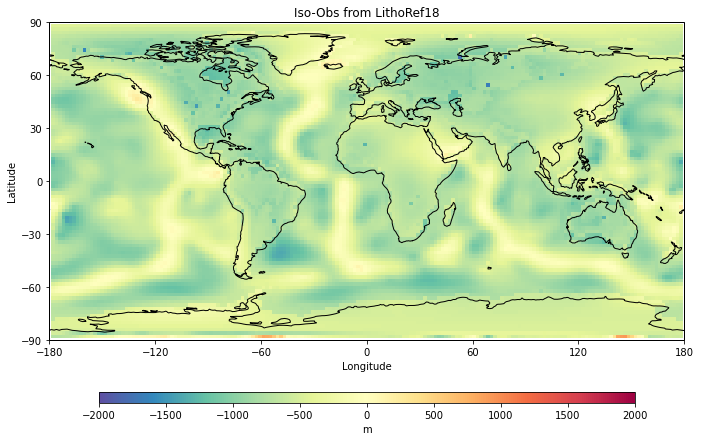

In [18]:
fname_fig = "Iso-Obs from LithoRef18"
plot_map(dtopo_g,extent_ref18,extent_global,cm.Spectral_r,-2000,2000,"m",fname_fig)

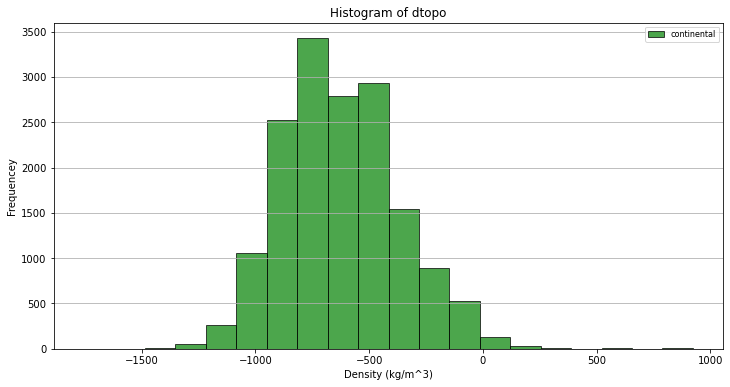

In [19]:
fname_fig = "Histogram of dtopo"
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.hist(dtopo_g.flatten(),bins=20, facecolor="green", edgecolor="black", alpha=0.7,label="continental")
#ax.hist(crho_ref18[is_ocean].flatten(),bins=20, facecolor="blue", edgecolor="black", alpha=0.7,label="oceanic")
ax.set_xlabel("Density (kg/m^3)")
ax.set_ylabel("Frequencey")
ax.grid(axis="y")
ax.set_title(fname_fig)
plt.legend(loc = 'upper right',prop = {'size':8}) 
plt.savefig((outputPath+fname_fig+'.png'),dpi=dpi,bbox_inches='tight')

In [20]:
wrho = 1030  # from Afonso2019
arho = 3250  # from Lamb2020
is_closeseal = np.abs(topo_ref18) < 50*0.001

alpha1,beta1 = 7.8,93
alpha2,beta2 = 6.5,65

ct_ref =  32  # from Lamb2020
clt_ref = 100 #from Lamb2020
Ea = (ct_ref18-ct_ref)/alpha1-(mlt_ref18+ct_ref18-clt_ref)/beta1
Eb = ((ct_ref18-ct_ref)/alpha2-(mlt_ref18+ct_ref18-clt_ref)/beta2)*arho/(arho-wrho)
Epre = Ea.copy()
Epre[is_undersea] = Eb[is_undersea]

# ct_ref = ct_ref18[is_closeseal].mean()  # 32 from Lamb2020
# clt_ref = ct_ref18[is_closeseal].mean()+mlt_ref18[is_closeseal].mean() #  100 from Lamb2020
# alpha = arho/(mlrho_ref18-crho_ref18)
# beta = arho/(mlrho_ref18-arho)
# Ea = (ct_ref18-ct_ref)/alpha-(mlt_ref18+ct_ref18-clt_ref)/beta
# Eb = Ea*arho/(arho-wrho)
# Epre = Ea.copy()
# Epre[is_undersea] = Eb[is_undersea]

dtopo = Epre-topo_ref18
dtopo_WLI = fn.xyz2grd(lons_ref18,lats_ref18,2,2,dtopo)*1000
dtopo_WLI.min(),dtopo_WLI.max()

(-4570.487612612613, 4757.03918918919)

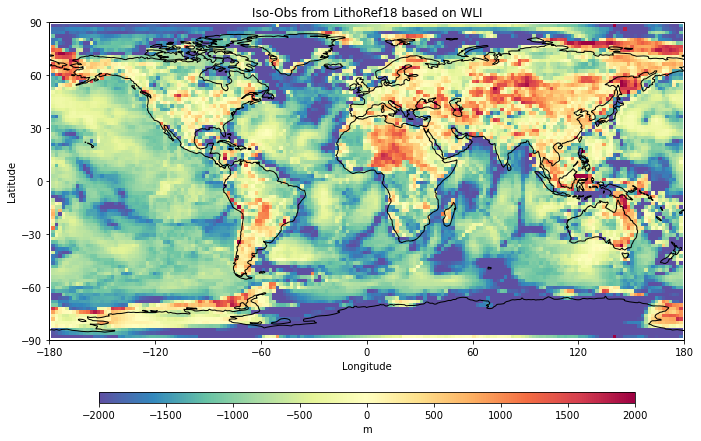

In [21]:
fname_fig = "Iso-Obs from LithoRef18 based on WLI"
plot_map(dtopo_WLI,extent_ref18,extent_global,cm.Spectral_r,-2000,2000,"m",fname_fig)

[](https://gsrm.unavco.org/model/)

In [22]:
from scipy.io import netcdf
fname = "../Data/velocity_NNR.nc"

rootgrp = netcdf.netcdf_file(fname, version=2)

ve = rootgrp.variables["ve"]
vn = rootgrp.variables["vn"]

lonv = rootgrp.variables["lon"]
latv = rootgrp.variables["lat"]

lons = lonv[::5]
lats = latv[::5]
llX, llY = np.meshgrid(lons,lats)

#llX = llX.reshape(-1)
#llY = llY.reshape(-1)

Veast = (np.array(ve[::5,::5]).T)
Vnorth = (np.array(vn[::5,::5]).T)

Vorientation = np.arctan2(Vnorth,Veast)

In [23]:
rootgrp.variables

OrderedDict([('ve', <scipy.io.netcdf.netcdf_variable at 0x7f64e5e138d0>),
             ('vn', <scipy.io.netcdf.netcdf_variable at 0x7f64e552b2d0>),
             ('lat', <scipy.io.netcdf.netcdf_variable at 0x7f64e5d36cd0>),
             ('lon', <scipy.io.netcdf.netcdf_variable at 0x7f64e5d36450>)])

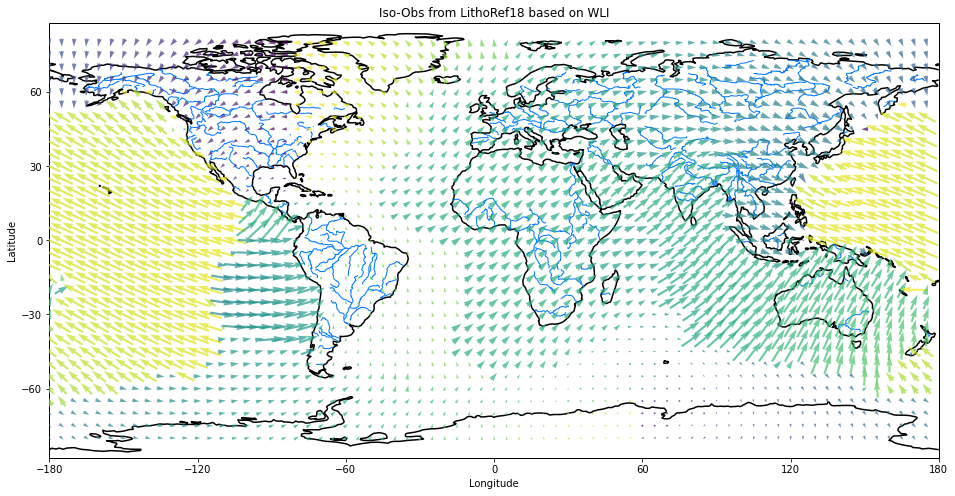

In [24]:
figname = "test"

fig, ax = plt.subplots(1, 1, figsize=(16,8))
ax = plt.axes(projection=prj_base)
ax.set(xlabel='Longitude', ylabel='Latitude',xticks=xticks_global,yticks=yticks_global,title=figname)
ax.set(title=fname_fig)
#ax.set_global()
mappable1 = ax.quiver(llX, llY, Veast, Vnorth, Vorientation, scale=2500, transform=prj_base,
color='#883300', alpha=0.7, zorder=13, pivot="mid")
ax.add_feature(coastline, linewidth=1.5, edgecolor="Black", zorder=5)
ax.add_feature(rivers,    linewidth=1.0, edgecolor="#0077FF", zorder=6)

plt.savefig((outputPath+figname+'.png'),dpi=dpi,bbox_inches='tight')